# Climate Change Explorer

##### ClimateChangeExplorer is a data analysis project focusing on global climate trends from 1961 to 2022, with predictive insights up to 2050. Leveraging Jupyter Notebooks, it offers data cleaning, visualization, and predictive modeling for understanding and forecasting climate change dynamics.

In [49]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration
### Visualization of my DataFrame:
- ObjectId: A unique identifier for each row in the table.
- Country: The name of the country.
- ISO2: The 2-letter ISO code of the country.
- ISO3: The 3-letter ISO code of the country.
- Indicator: Describes the type of climate indicator, in this case, 'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980'.
- Unit: The unit in which the indicator is measured, in this case, degrees Celsius.
- Source: The source of the data.
- CTS_Code: Code related to surface temperature change.
- CTS_Name: Name related to surface temperature change.
- CTS_Full_Descriptor: Complete description of surface temperature change.
- F1961 to F2022: Columns representing temperature changes for each year from 1961 to 2022.

In [50]:
df = pd.read_csv('climate_change_indicators.csv')

In [51]:
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.28,0.46,1.09,1.55,1.54,1.54,0.91,0.50,1.33,2.01
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.33,1.20,1.57,1.46,1.12,2.03,1.68,1.50,1.54,1.52
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.19,1.69,1.12,1.76,1.51,1.21,1.11,1.93,2.33,1.69
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.26,1.17,1.01,1.54,1.44,1.19,1.54,1.43,1.27,1.26
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.83,1.95,1.69,1.99,1.93,1.92,1.96,2.56,1.53,3.24


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

In [53]:
df.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.00,188.00,189.00,188.00,188.00,188.00,192.00,191.00,191.00,190.00,...,216.00,216.00,216.00,213.00,214.00,213.00,213.00,212.00,213.00,213.00
mean,113.00,0.16,-0.01,-0.01,-0.07,-0.25,0.11,-0.11,-0.20,0.16,...,0.93,1.11,1.27,1.44,1.28,1.30,1.44,1.55,1.34,1.38
std,65.10,0.41,0.34,0.39,0.31,0.27,0.38,0.34,0.27,0.31,...,0.32,0.56,0.46,0.40,0.39,0.60,0.47,0.62,0.48,0.67
min,1.00,-0.69,-0.91,-1.27,-0.88,-1.06,-1.80,-1.05,-1.63,-0.90,...,0.12,-0.09,-0.43,0.25,0.02,0.24,0.05,0.23,-0.42,-1.30
25%,57.00,-0.10,-0.16,-0.21,-0.24,-0.39,-0.04,-0.26,-0.34,-0.01,...,0.74,0.74,1.02,1.15,1.03,0.86,1.17,1.16,1.02,0.88
50%,113.00,0.06,-0.06,-0.00,-0.06,-0.23,0.10,-0.15,-0.19,0.20,...,0.90,0.99,1.22,1.45,1.28,1.12,1.41,1.48,1.33,1.31
75%,169.00,0.32,0.11,0.23,0.13,-0.09,0.28,0.01,-0.07,0.35,...,1.19,1.34,1.52,1.71,1.53,1.83,1.70,1.83,1.63,1.92
max,225.00,1.89,1.00,1.20,1.10,0.86,1.15,1.13,0.48,0.94,...,1.64,2.70,2.61,2.46,2.49,2.77,2.69,3.69,2.68,3.24


## Data cleaning and transformation
####
- Dropping duplicate values (no duplicate values exist).
- Transformation of year columns (remove 'F' from column names).
- Handling null values (transform null values to the mean, avoid data loss).

In [54]:
df.shape

(225, 72)

In [55]:
column_names= df.columns
new_column_names = {col: col[1:] for col in column_names if col.startswith('F')}
df.rename(columns=new_column_names, inplace=True)

In [56]:
df.drop_duplicates()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.28,0.46,1.09,1.55,1.54,1.54,0.91,0.50,1.33,2.01
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.33,1.20,1.57,1.46,1.12,2.03,1.68,1.50,1.54,1.52
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.19,1.69,1.12,1.76,1.51,1.21,1.11,1.93,2.33,1.69
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.26,1.17,1.01,1.54,1.44,1.19,1.54,1.43,1.27,1.26
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.83,1.95,1.69,1.99,1.93,1.92,1.96,2.56,1.53,3.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.42,1.40,1.51,1.73,2.20,0.94,1.48,2.07,1.59,1.97
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.02,1.05,1.41,1.66,1.43,1.29,1.44,1.71,1.45,1.39
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.79,0.92,1.45,1.40,0.10,0.65,0.85,0.89,0.82,0.69


In [57]:
df_notnull = df.dropna()

In [58]:
df_notnull.shape

(156, 72)

In [59]:
df.isnull().sum()

ObjectId      0
Country       0
ISO2          2
ISO3          0
Indicator     0
             ..
2018         12
2019         12
2020         13
2021         12
2022         12
Length: 72, dtype: int64

In [60]:
df=df.drop('ISO2', axis=1)

In [61]:
columns_float = df.select_dtypes(include='float64').columns

In [62]:
for column in columns_float:
    mean_column = df[column].mean()
    df[column] = df[column].fillna(mean_column)

In [63]:
df.isnull().sum()

ObjectId     0
Country      0
ISO3         0
Indicator    0
Unit         0
            ..
2018         0
2019         0
2020         0
2021         0
2022         0
Length: 71, dtype: int64

In [64]:
df.shape

(225, 71)

In [65]:
df.head()

,ObjectId,Country,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,1961,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,"Afghanistan, Islamic Rep. of",AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",-0.11,...,1.28,0.46,1.09,1.55,1.54,1.54,0.91,0.50,1.33,2.01
1,2,Albania,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.63,...,1.33,1.20,1.57,1.46,1.12,2.03,1.68,1.50,1.54,1.52
2,3,Algeria,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.16,...,1.19,1.69,1.12,1.76,1.51,1.21,1.11,1.93,2.33,1.69
3,4,American Samoa,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.08,...,1.26,1.17,1.01,1.54,1.44,1.19,1.54,1.43,1.27,1.26
4,5,"Andorra, Principality of",AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.74,...,0.83,1.95,1.69,1.99,1.93,1.92,1.96,2.56,1.53,3.24


## Descriptive statistics

### Exploratory data analysis

In [66]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,ObjectId,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00,...,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00
mean,113.00,0.16,-0.01,-0.01,-0.07,-0.25,0.11,-0.11,-0.20,0.16,...,0.93,1.11,1.27,1.44,1.28,1.30,1.44,1.55,1.34,1.38
std,65.10,0.37,0.31,0.35,0.28,0.25,0.35,0.31,0.25,0.28,...,0.32,0.55,0.45,0.39,0.38,0.58,0.45,0.60,0.47,0.65
min,1.00,-0.69,-0.91,-1.27,-0.88,-1.06,-1.80,-1.05,-1.63,-0.90,...,0.12,-0.09,-0.43,0.25,0.02,0.24,0.05,0.23,-0.42,-1.30
25%,57.00,-0.07,-0.14,-0.17,-0.21,-0.36,-0.01,-0.25,-0.29,0.02,...,0.75,0.76,1.03,1.16,1.04,0.88,1.18,1.19,1.03,0.89
50%,113.00,0.15,-0.02,-0.01,-0.07,-0.25,0.11,-0.11,-0.20,0.16,...,0.92,1.01,1.23,1.44,1.28,1.15,1.44,1.50,1.34,1.35
75%,169.00,0.25,0.08,0.17,0.10,-0.11,0.24,-0.04,-0.10,0.30,...,1.18,1.31,1.52,1.69,1.51,1.61,1.68,1.78,1.60,1.86
max,225.00,1.89,1.00,1.20,1.10,0.86,1.15,1.13,0.48,0.94,...,1.64,2.70,2.61,2.46,2.49,2.77,2.69,3.69,2.68,3.24


In [67]:
df=df.drop('ObjectId', axis=1)

In [68]:
columns_float = df.select_dtypes(include='float64')


In [69]:
columns_float_numeric = columns_float.apply(pd.to_numeric, errors='coerce')

In [70]:
mean_general = columns_float_numeric.stack().mean()
mode_general = pd.Series(columns_float_numeric.stack()).mode()[0]
median_general = pd.Series(columns_float_numeric.stack()).median()

In [71]:
print(f"Mean general: {mean_general}")
print(f"Mode general: {mode_general}")
print(f"Median general: {median_general}")

Mean general: 0.5133257312792895
Mode general: 0.1658162162162162
Median general: 0.4255


In [72]:
mean_by_year = columns_float.mean(axis=0)

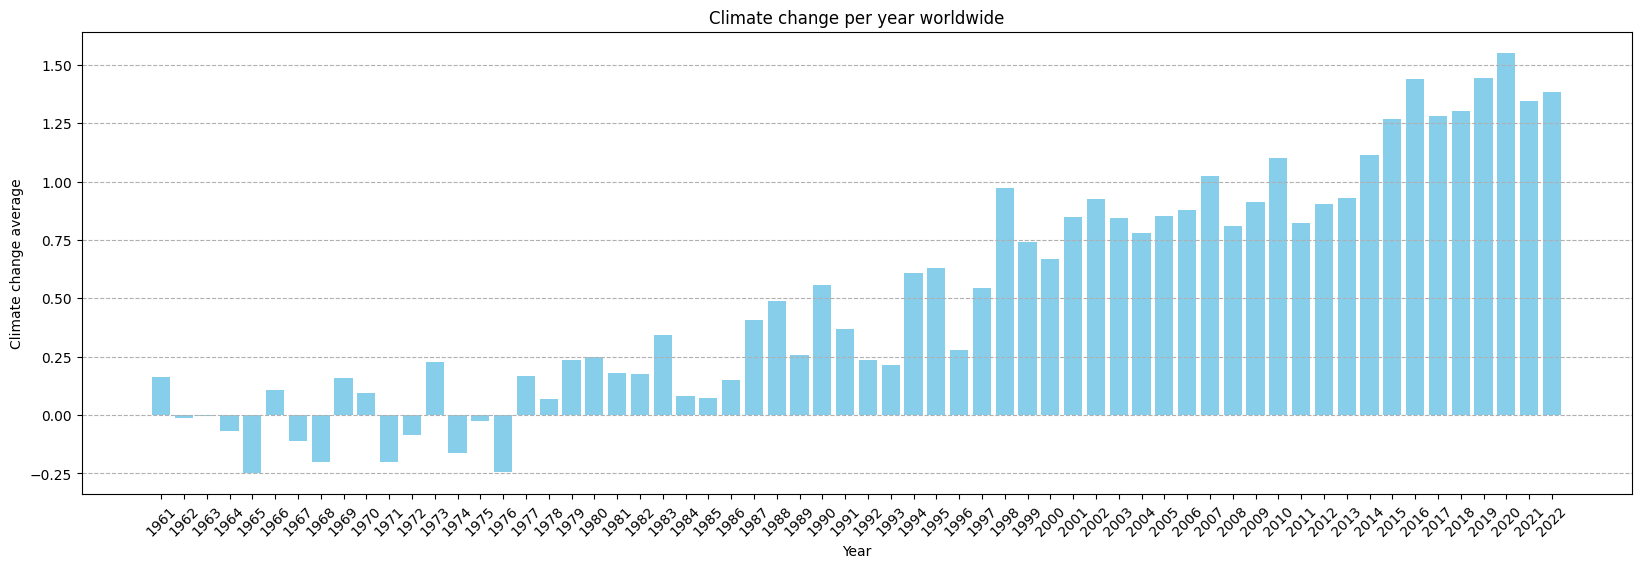

In [73]:
plt.figure(figsize=(20, 6))
plt.bar(mean_by_year.index, mean_by_year.values, color='skyblue')
plt.title('Climate change per year worldwide')
plt.xlabel('Year')
plt.ylabel('Climate change average')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

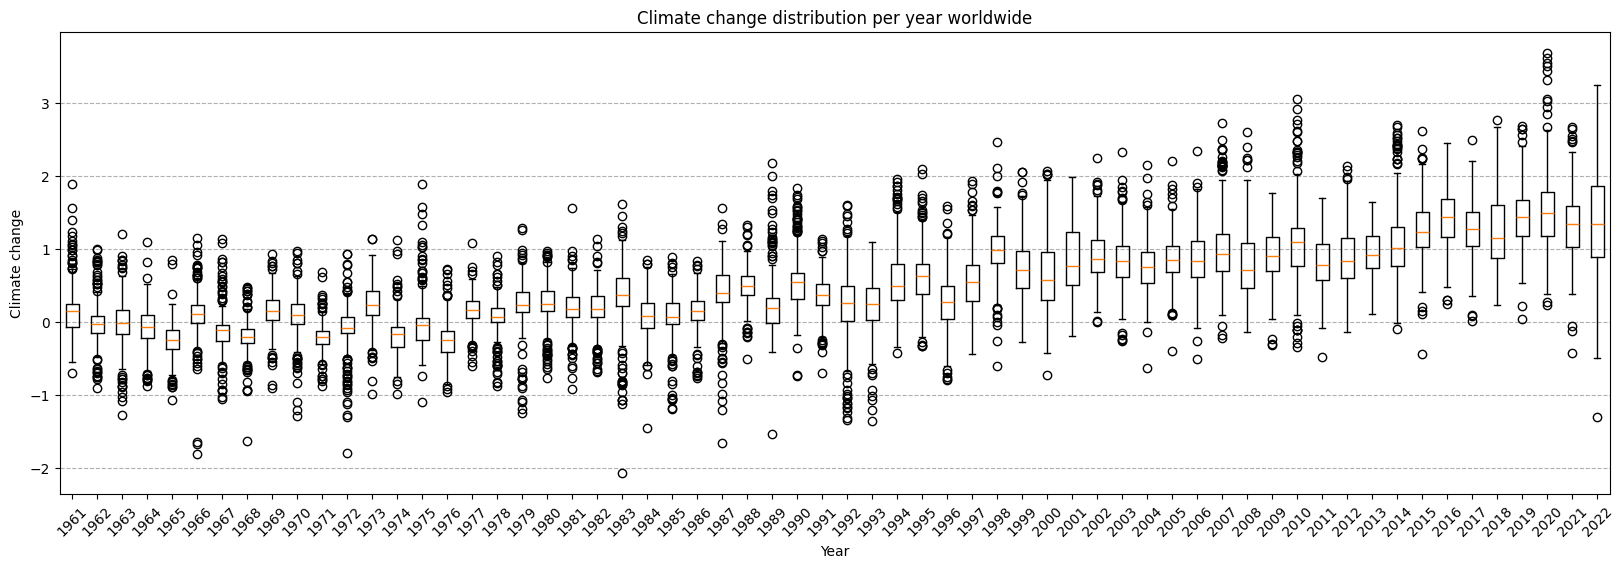

In [77]:
plt.figure(figsize=(20, 6))
plt.boxplot(columns_float_numeric.values, labels=labels)
plt.title('Climate change distribution per year worldwide')
plt.xlabel('Year')
plt.ylabel('Climate change')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

#### Measures of Dispersion

In [80]:
range= columns_float.max() - columns_float.min()
print(range)

1961   2.59
1962   1.91
1963   2.47
1964   1.97
1965   1.92
       ... 
2018   2.53
2019   2.64
2020   3.46
2021   3.10
2022   4.55
Length: 62, dtype: float64


In [82]:
range_general = range.max()
print(range_general)

4.548


In [86]:
columns_float.var().max()

0.42393784507042254

In [89]:
columns_float.std().max()

0.6511050952576108

#### Correlation

In [104]:
columns_year = df.filter(regex=r'^\d{4}$', axis=1)

In [105]:
df_new= df[columns_year.columns].copy()

In [118]:
df_new.quantile(0.25).mean()

0.30609677419354836

In [116]:
df_new.quantile(0.5).mean()

0.49509436541016033

In [119]:
df_new.quantile(0.75).mean()

0.7064193548387095

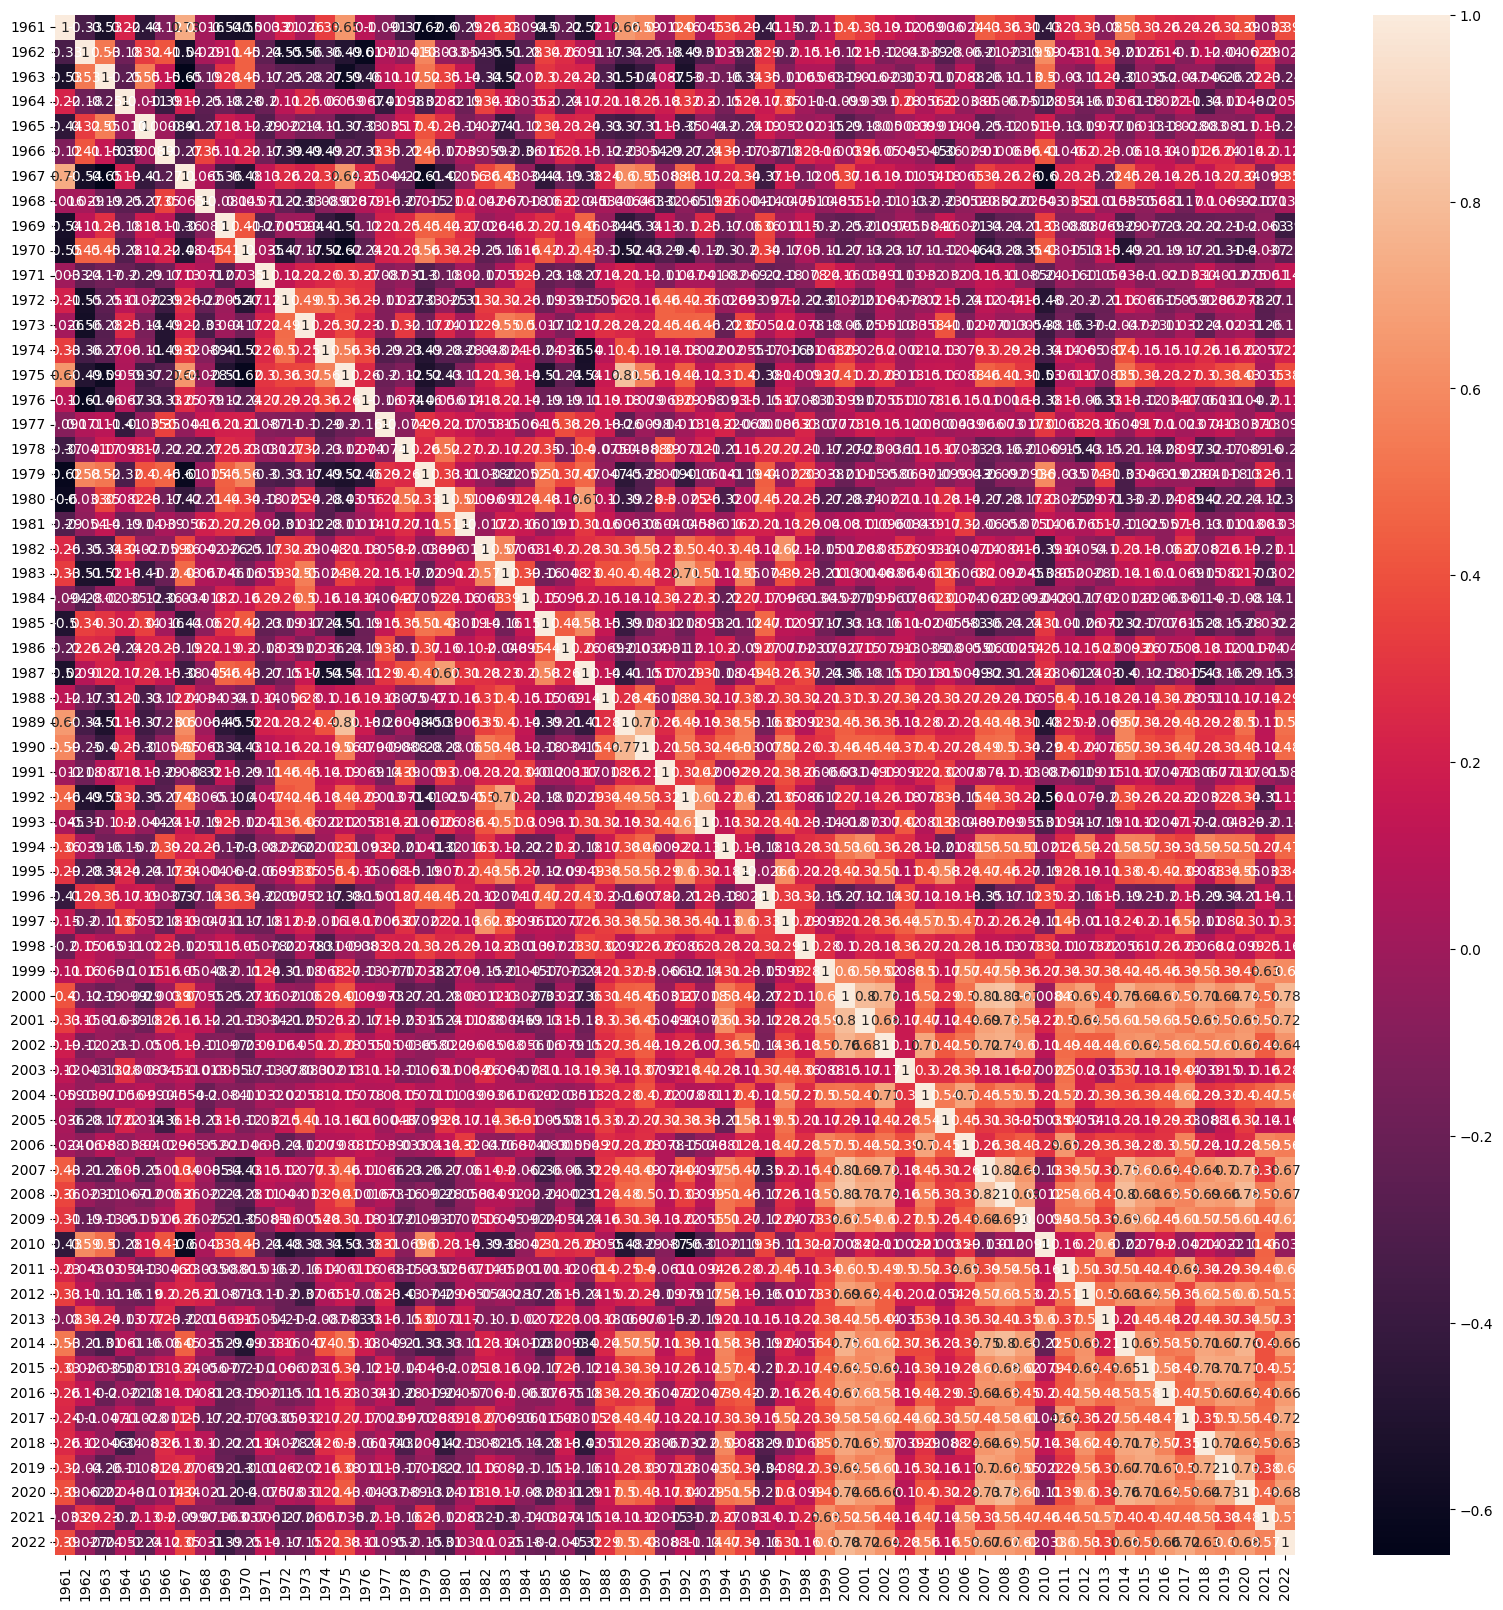

In [110]:
correlation_matrix = df_new.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()